## Classification using Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using the movies dataset, we are going to predict whether a movie will win an Oscar or not.

We will select the following features to do the classification:

*  title_type
*  genre
*  runtime
*  mpaa_rating
*  imdb_num_votes
*  imdb_rating
*  critics_rating
*  critics_score
*  audience_rating
*  audience_score
*  best_actor_win
*  best_actress_win
*  best_dir_win
*  top200_box

Note that "imdb_rating" and other deatures are now being used to predict our target variable "best_pic_win". We also dropped the "best_pic_nom" feature since we would like to predict the possibility of winning before the awards season so we should not rely on nomination information.

We first build a Dataframe using pandas function pd.read_csv,
and drop the unwanted columns.

In [ ]:
#Read csv file and grab the wanted columns:
df = pd.read_csv('movies.csv', index_col='title')
df.drop(['imdb_url', 'rt_url', 'thtr_rel_year', 'thtr_rel_day', 'dvd_rel_year', 'dvd_rel_day'], axis=1, inplace=True)

data = df.loc[:,['title_type', 'genre', 'runtime', 'mpaa_rating', 'imdb_rating', 'imdb_num_votes', 'critics_rating', 'critics_score', 'audience_rating', 'audience_score', 'best_pic_win', 'best_actor_win', 'best_actress_win', 'best_dir_win', 'top200_box']]
data.head()

We should see if there is missing data (NULL) and remove them from the dataset

In [ ]:
data.isna().sum()

title_type          0
genre               0
runtime             1
mpaa_rating         0
imdb_rating         0
imdb_num_votes      0
critics_rating      0
critics_score       0
audience_rating     0
audience_score      0
best_pic_win        0
best_actor_win      0
best_actress_win    0
best_dir_win        0
top200_box          0
dtype: int64

In [ ]:
#Remove samples with missing data
data.dropna(axis=0, inplace=True)
#Check the number of NULL values in each column
data.isna().sum()

title_type          0
genre               0
runtime             0
mpaa_rating         0
imdb_rating         0
imdb_num_votes      0
critics_rating      0
critics_score       0
audience_rating     0
audience_score      0
best_pic_win        0
best_actor_win      0
best_actress_win    0
best_dir_win        0
top200_box          0
dtype: int64

Since we have some categorical features, we will now transform them into numerical values using one-hot or dummy encoding.

In [ ]:
#one-hot Encoding
data = pd.get_dummies(data, drop_first=True)
data.head()

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score,title_type_Feature Film,title_type_TV Movie,genre_Animation,genre_Art House & International,genre_Comedy,genre_Documentary,genre_Drama,genre_Horror,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Other,genre_Science Fiction & Fantasy,mpaa_rating_NC-17,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R,mpaa_rating_Unrated,critics_rating_Fresh,critics_rating_Rotten,audience_rating_Upright,best_pic_win_yes,best_actor_win_yes,best_actress_win_yes,best_dir_win_yes,top200_box_yes
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Filly Brown,80.0,5.5,899,45,73,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
The Dish,101.0,7.3,12285,96,81,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
Waiting for Guffman,84.0,7.6,22381,91,91,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
The Age of Innocence,139.0,7.2,35096,80,76,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
Malevolence,90.0,5.1,2386,33,27,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


Since the range of values for each feature are different, we bring all values in the same standing, by scaling them, so that one significant number doesn’t impact the model just because of their large magnitude.

The StandardScaler function will transform our data such that its distribution will have a mean value 0 and standard deviation of 1.

In [ ]:
#Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

list_num_features = ['runtime', 'imdb_num_votes', 'imdb_rating', 'critics_score', 'audience_score']
data.loc[:,list_num_features] = scaler.fit_transform(data.loc[:,list_num_features])
data.head()

,runtime,imdb_rating,imdb_num_votes,critics_score,audience_score,title_type_Feature Film,title_type_TV Movie,genre_Animation,genre_Art House & International,genre_Comedy,genre_Documentary,genre_Drama,genre_Horror,genre_Musical & Performing Arts,genre_Mystery & Suspense,genre_Other,genre_Science Fiction & Fantasy,mpaa_rating_NC-17,mpaa_rating_PG,mpaa_rating_PG-13,mpaa_rating_R,mpaa_rating_Unrated,critics_rating_Fresh,critics_rating_Rotten,audience_rating_Upright,best_pic_win_yes,best_actor_win_yes,best_actress_win_yes,best_dir_win_yes,top200_box_yes
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Filly Brown,-1.328946,-0.914681,-0.505979,-0.445723,0.526844,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
The Dish,-0.248148,0.745795,-0.404411,1.350718,0.922510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
Waiting for Guffman,-1.123080,1.022541,-0.314350,1.174596,1.417092,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
The Age of Innocence,1.707582,0.653546,-0.200927,0.787128,0.675219,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0
Malevolence,-0.814281,-1.283676,-0.492714,-0.868415,-1.748234,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


We will now split the data for training and testing using train_test_split to get a testing dataset containing 20% of all the values, and the other 80% will be used to train our model.  

In [ ]:
#Split the data into training and testing sets:
from sklearn.model_selection import train_test_split

X = data.drop('best_pic_win_yes', axis=1).values
y = data.loc[:,'best_pic_win_yes'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=51)

print(f"Train size ={X_train.shape[0]}")
print(f"Test size ={X_test.shape[0]}") 

Train size =520
Test size =130


We will now implement Logistic Regression to solve the classification problem. We can show the accuracy for both the training and testing set, with training having a higher accuracy since this is the data we are using to train our model.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

#train a logistic regression model
logreg.fit(X_train, y_train)

#Show accuracy of using the logreg.score() using the test set
print(f'Training accuracy: {logreg.score(X_train, y_train)}')
print(f'Testing accuracy: {logreg.score(X_test, y_test)}')

Training accuracy: 0.9942307692307693
Testing accuracy: 0.9769230769230769


Now we will use the magnitudes of the learned weights to gain insight regarding which variables are more important for the prediction.

First, we access the learned parameters from the model we just trained and display them.

In [ ]:
print(f'Model Coefficients: {logreg.coef_}')
print(f'Model y-Intercept ie θ zero: {logreg.intercept_}')

Model Coefficients: [[ 0.52064358  0.33780387  0.4840387   0.68376668  0.32125095  0.17309428
  -0.00327131 -0.00708148 -0.00695411  0.68306872 -0.15199916  0.12327447
  -0.00758357 -0.03197193 -0.03664014 -0.07072594 -0.10557272 -0.00215682
   0.46738585 -0.37702732  0.07941289 -0.15087871 -0.53122092 -0.14817306
   0.12487278  0.21855198  0.36609247  1.63279874 -0.15826202]]
Model y-Intercept ie θ zero: [-7.37508959]


Knowing that we scaled our features and therefore parameters with higher magnitudes indicate more important features, we can visualize the parameter magnitude for each feature (for magnitude we use the absolute value of the parameter to make the comparison easier).

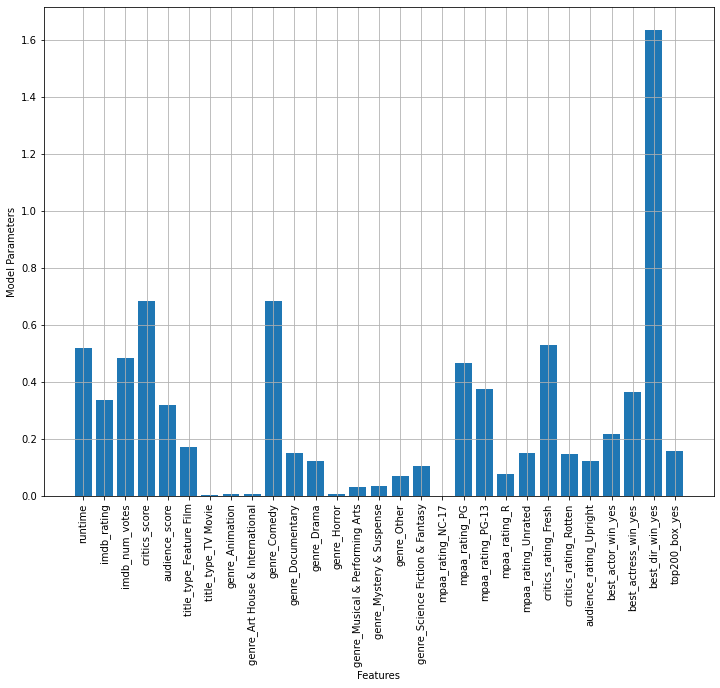

In [ ]:
list_features = list(data.drop('best_pic_win_yes', axis=1).columns)
absolute_params = np.abs(logreg.coef_[0])
plt.figure(figsize=(12,9))
plt.bar(x=list_features, height=absolute_params)
plt.xticks(rotation=90);
plt.xlabel('Features');
plt.ylabel('Model Parameters');
plt.grid()

Based on what we see in the above plot, the most important characteristic of a movie that could lead to winning an Oscar, is whether the director had previously won an Oscar in his career.

4) The LogisticRegression class implements by default the L2 norm regularization. Repeat the steps from parts 2 and 3 with L1 (Lasso) regularization.

In [ ]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=12);
#Train the model
lasso.fit(X_train, y_train)
#evaluate
print(f'Training accuracy: {lasso.score(X_train, y_train)}')
print(f'Testing accuracy: {lasso.score(X_test, y_test)}')

Training accuracy: 0.9942307692307693
Testing accuracy: 0.9846153846153847


In [ ]:
#Print Coefficients
print(lasso.coef_[0])

[ 0.31031845  0.          0.50917585  0.25855662  0.01225896  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.17002828  0.
  0.          0.          0.          2.31519402  0.        ]


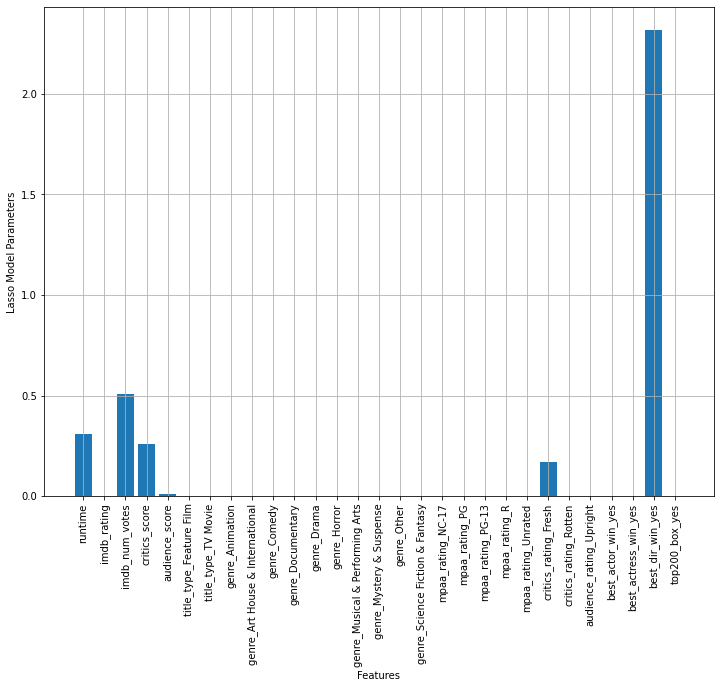

In [ ]:
#Plot 
absolute_params1 = np.abs(lasso.coef_[0])
plt.figure(figsize=(12,9))
plt.bar(x=list_features, height=absolute_params1)
plt.xticks(rotation=90);
plt.xlabel('Features');
plt.ylabel('Lasso Model Parameters');
plt.grid()

5) Compare the resulting Lasso Weights to the weights you got before and comment on the difference.

* Many weights were brought down to zero.
* The weights that are nonzero are the same weights that were found to be of highest importance by the L2 model.
* L1 selects only the most important features.